Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

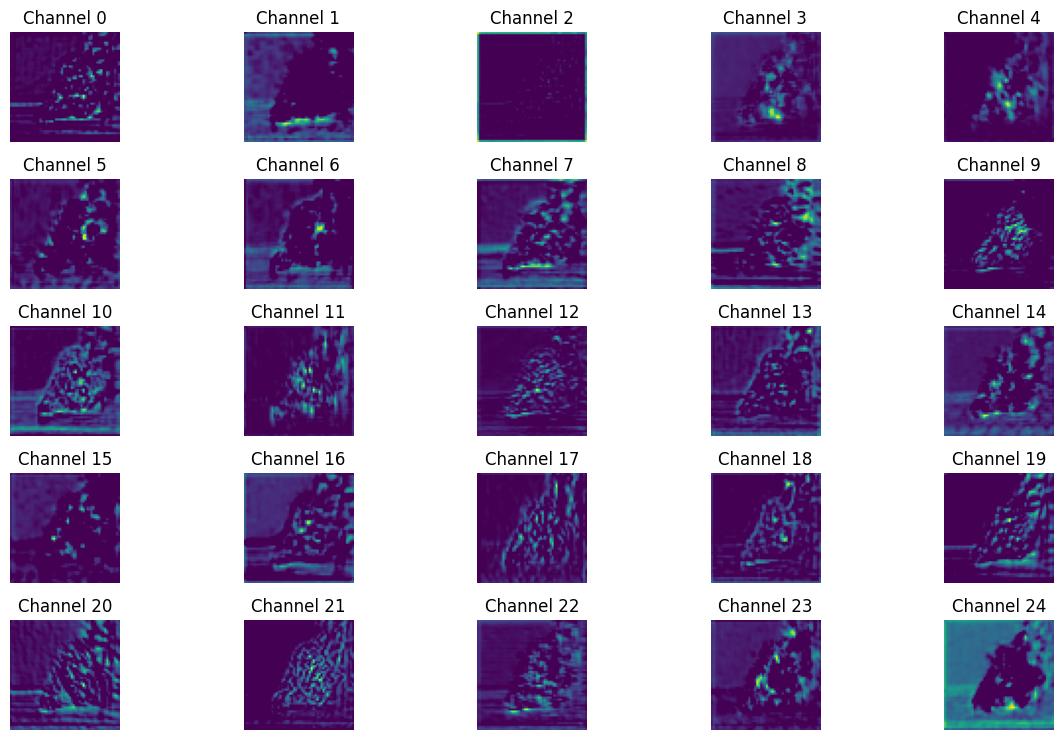

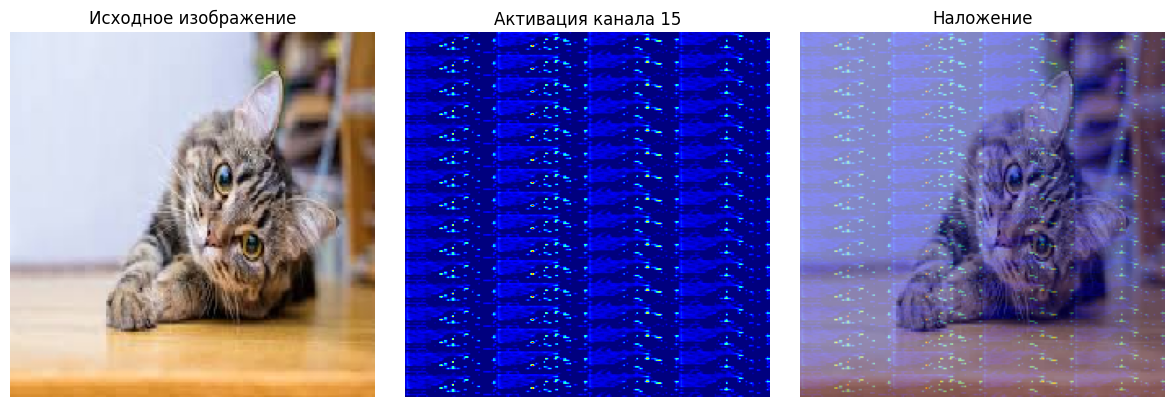

In [3]:

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Загрузка предобученной модели
model = VGG16(weights='imagenet', include_top=True)
model.summary()

# Создание модели, которая возвращает активации конкретного слоя
layer_name = 'block3_conv1'
activation_model = tf.keras.Model(inputs=model.input, 
                              outputs=model.get_layer(layer_name).output)

# Загрузка и предобработка изображения
img_path = 'cats/cat.jfif'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получение активаций
activations = activation_model.predict(x)

# Визуализация активаций
def display_activation(activations, col_size, row_size):
    activation = activations[0]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))
    
    for row in range(row_size):
        for col in range(col_size):
            if activation_index < activation.shape[2]:
                ax[row, col].imshow(activation[:, :, activation_index], cmap='viridis')
                ax[row, col].set_title(f'Channel {activation_index}')
                ax[row, col].axis('off')
                activation_index += 1
    
    plt.tight_layout()
    plt.show()

# Отображение первых 25 каналов (5x5 сетка)
display_activation(activations, 5, 5)

# Наложение карты активации на исходное изображение для конкретного канала
def overlay_activation_on_image(img_path, activation, channel_idx=0):
    # Загрузка оригинального изображения
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img) / 255.0
    
    # Получение активации конкретного канала
    channel_activation = activation[0, :, :, channel_idx]
    
    # Нормализация активации
    channel_activation = (channel_activation - channel_activation.min()) / (channel_activation.max() - channel_activation.min())
    
    # Изменение размера до размеров изображения
    heatmap = np.uint8(255 * channel_activation)
    heatmap = np.resize(heatmap, (224, 224))
    
    # Создаем цветовую карту активации
    heatmap_colored = cm.jet(heatmap)[:, :, :3]
    
    # Накладываем на изображение
    overlay = 0.4 * heatmap_colored + 0.6 * img_arr
    
    # Визуализация
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.imshow(img_arr)
    plt.title('Исходное изображение')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(heatmap, cmap='jet')
    plt.title(f'Активация канала {channel_idx}')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(overlay)
    plt.title('Наложение')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Наложение активации канала 15 на изображение
overlay_activation_on_image(img_path, activations, channel_idx=15)
